<a href="https://colab.research.google.com/github/Adeyinka-hub/MY-MACHINE-LEARNING-AND-DEEP-LEARNING-WORKS-ON-KAGGLE-AND-ZINDI-RESPECTIVELY/blob/master/KAGGLE%20DIGIT%20RECOGNIZER%20CHALLENGE(100%25%20ACCURACY%20ATTAINED%20ON%20LB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the necessary libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.datasets import mnist

sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [ ]:
# Download Data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"], axis = 1) 

In [ ]:
# Load more data sets, if there is no such data, validation accuracy = 0.9964
# With this batch of data, the validation accuracy can reach 0.9985
(x_train1, y_train1), (x_test1, y_test1) = mnist.load_data()

train1 = np.concatenate([x_train1, x_test1], axis=0)
y_train1 = np.concatenate([y_train1, y_test1], axis=0)

Y_train1 = y_train1
X_train1 = train1.reshape(-1, 28*28)

11493376/11490434 [==============================] - 1s 0us/step


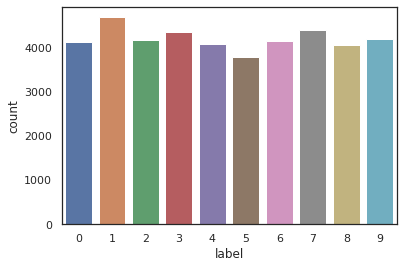

In [ ]:
# Print data histogram
g = sns.countplot(Y_train)

In [ ]:
# Normalize data to make CNN faster
X_train = X_train / 255.0
test = test / 255.0

X_train1 = X_train1 / 255.0

In [ ]:
# Reshape Picture is 3D array (height = 28px, width = 28px , canal = 1)
X_train = np.concatenate((X_train.values, X_train1))
Y_train = np.concatenate((Y_train, Y_train1))

In [ ]:
X_train = X_train.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [ ]:
# Convert label to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

In [ ]:
# Split dataset into training set and validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

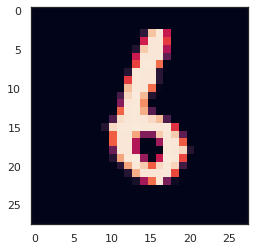

In [ ]:
# Draw an example of a data set to see
g = plt.imshow(X_train[189][:,:,0])

In [ ]:
#Creating CNN model
"""
  [[Conv2D->relu]*2 -> BatchNormalization -> MaxPool2D -> Dropout]*2 -> 
  [Conv2D->relu]*2 -> BatchNormalization -> Dropout -> 
  Flatten -> Dense -> BatchNormalization -> Dropout -> Out
"""
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same',  activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(10, activation = "softmax"))
model.summary()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        102464    
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0   

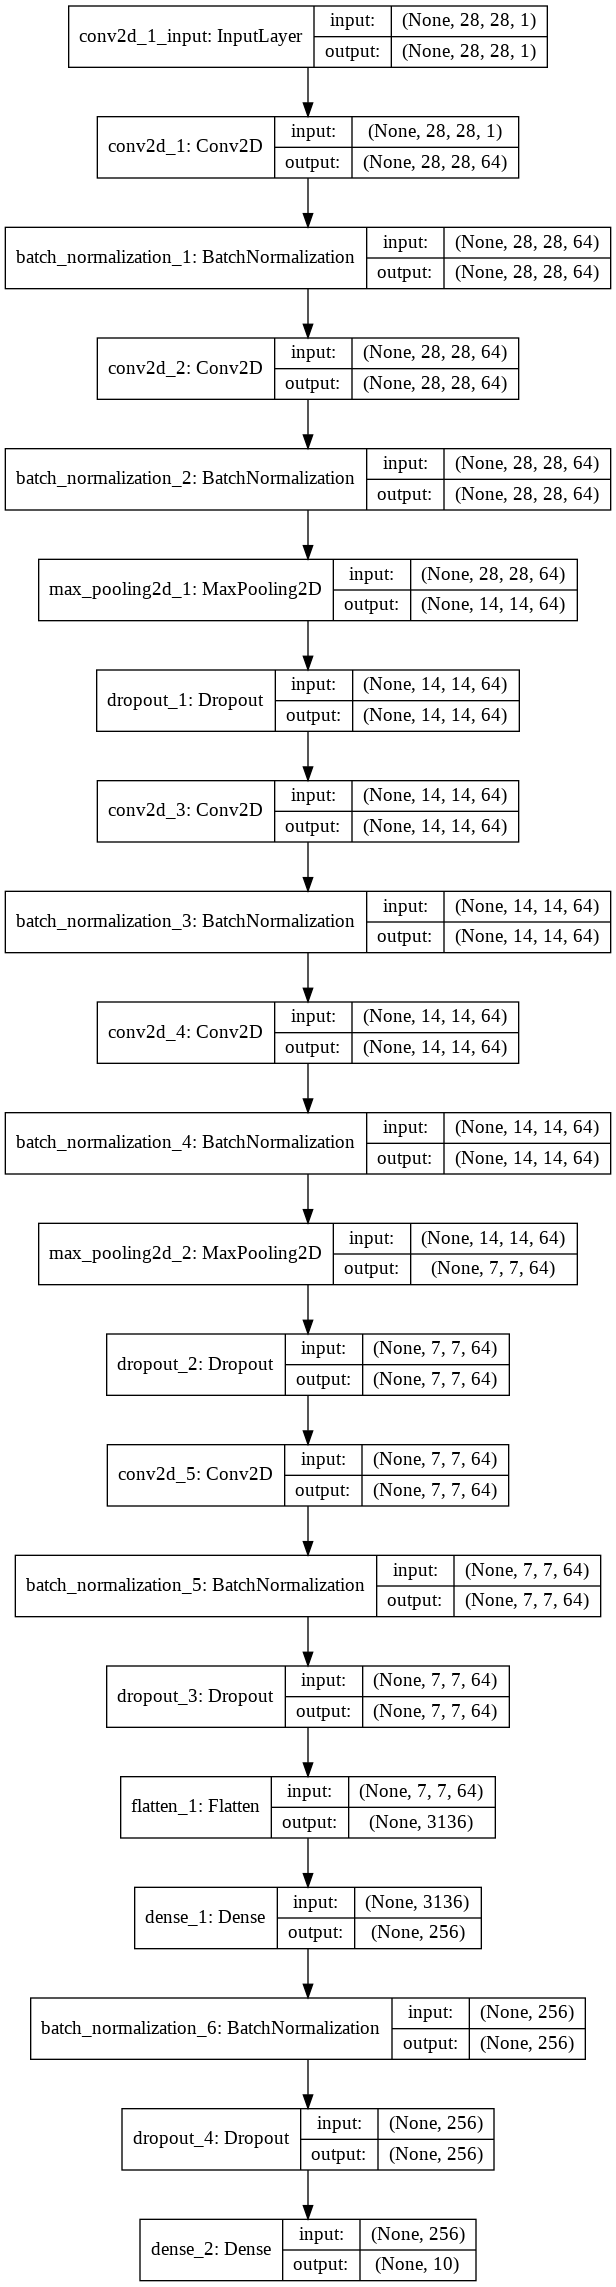

In [ ]:
# print out model look
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model.png")

In [ ]:
# Define Optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [ ]:
# Compile model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Audjusting learning rate
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
#Adjusting epochs and batch_size
epochs = 50
batch_size = 128

In [ ]:
#Data Augmentation 
datagen = ImageDataGenerator(
        featurewise_center=False, # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(X_train)

In [ ]:
#Prediction model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
 - 40s - loss: 0.1399 - acc: 0.9563 - val_loss: 0.0479 - val_acc: 0.9867
Epoch 2/50
 - 32s - loss: 0.0478 - acc: 0.9853 - val_loss: 0.0413 - val_acc: 0.9886
Epoch 3/50
 - 33s - loss: 0.0391 - acc: 0.9883 - val_loss: 0.0199 - val_acc: 0.9929
Epoch 4/50
 - 33s - loss: 0.0319 - acc: 0.9901 - val_loss: 0.0207 - val_acc: 0.9929
Epoch 5/50
 - 33s - loss: 0.0289 - acc: 0.9911 - val_loss: 0.0166 - val_acc: 0.9943
Epoch 6/50
 - 33s - loss: 0.0260 - acc: 0.9920 - val_loss: 0.0189 - val_acc: 0.9945
Epoch 7/50
 - 32s - loss: 0.0255 - acc: 0.9924 - val_loss: 0.0126 - val_acc: 0.9970
Epoch 8/50
 - 33s - loss: 0.0228 - acc: 0.9931 - val_loss: 0.0175 - val_acc: 0.9948
Epoch 9/50
 - 33s - loss: 0.0222 - acc: 0.9935 - val_loss: 0.0124 - val_acc: 0.9967
Epoch 10/50
 - 33s - loss: 0.0215 - acc: 0.9937 - val_loss: 0.0112 - val_acc: 0.9965

Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.000

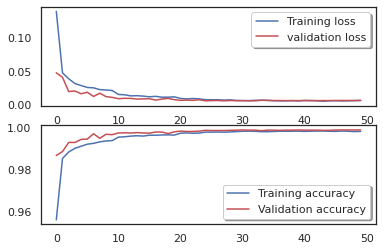

In [ ]:
# Draw the loss and accuracy curves of the training set and the validation set.
# Can judge whether it is under-fitting or over-fitting
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

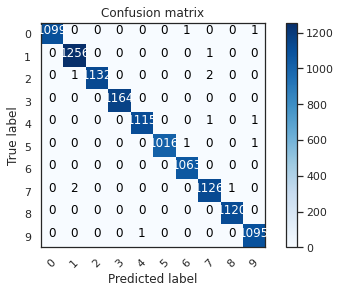

In [ ]:
# Draw a confusion matrix that can be used to observe high false positives

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

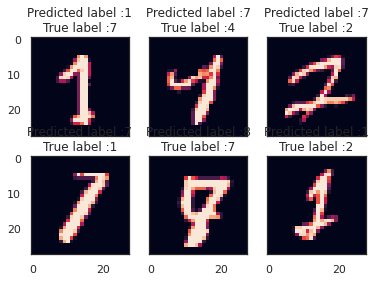

In [ ]:
# Show some wrong results, and the difference between the predicted label and the real labe
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [ ]:
# Make predictions about test sets
results = model.predict(test)

# Convert one-hot vector to number
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [ ]:
# Save the final result in cnn_mnist_submission.csv
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_submission.csv",index=False)

# TUNING:

In [ ]:
pip install -U keras-tuner

In [ ]:
import kerastuner as kt
import tensorflow as tf
import tensorflow_datasets as tfds


def build_model(hp):
    """Builds a convolutional model."""
    inputs = tf.keras.Input(shape=(28, 28, 1))
    x = inputs
    for i in range(hp.Int('conv_layers', 1, 3, default=3)):
        x = tf.keras.layers.Conv2D(
            filters=hp.Int('filters_' + str(i), 4, 32, step=4, default=8),
            kernel_size=hp.Int('kernel_size_' + str(i), 3, 5),
            activation='relu',
            padding='same')(x)

        if hp.Choice('pooling' + str(i), ['max', 'avg']) == 'max':
            x = tf.keras.layers.MaxPooling2D()(x)
        else:
            x = tf.keras.layers.AveragePooling2D()(x)

        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.ReLU()(x)

    if hp.Choice('global_pooling', ['max', 'avg']) == 'max':
        x = tf.keras.layers.GlobalMaxPooling2D()(x)
    else:
        x = tf.keras.layers.GlobalAveragePooling2D()(x)
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)

    optimizer = hp.Choice('optimizer', ['adam', 'sgd'])
    model.compile(optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


def convert_dataset(item):
    """Puts the mnist dataset in the format Keras expects, (features, labels)."""
    image = item['image']
    label = item['label']
    image = tf.dtypes.cast(image, 'float32') / 255.
    return image, label


def main():
    """Runs the hyperparameter search."""
    tuner = kt.Hyperband(
        hypermodel=build_model,
        objective='val_accuracy',
        max_epochs=8,
        factor=2,
        hyperband_iterations=3,
        distribution_strategy=tf.distribute.MirroredStrategy(),
        directory='results_dir',
        project_name='mnist')

    mnist_data = tfds.load('mnist')
    mnist_train, mnist_test = mnist_data['train'], mnist_data['test']
    mnist_train = mnist_train.map(convert_dataset).shuffle(1000).batch(100).repeat()
    mnist_test = mnist_test.map(convert_dataset).batch(100)

    tuner.search(mnist_train,
                 steps_per_epoch=600,
                 validation_data=mnist_test,
                 validation_steps=100,
                 epochs=20,
                 callbacks=[tf.keras.callbacks.EarlyStopping('val_accuracy')])

if __name__ == '__main__':
  
     main()

# KERAS-TEAM HYPER TUNING:

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


from kerastuner.tuners import RandomSearch
from kerastuner.engine.hypermodel import HyperModel
from kerastuner.engine.hyperparameters import HyperParameters


(X,Y), (X_val, Y_val) = keras.datasets.mnist.load_data()
X = X.astype('float32') / 255.
X_val = X_val.astype('float32') / 255.

X = X[:10000]
Y = Y[:10000]


"""Basic case:
- We define a `build_model` function
- It returns a compiled model
- It uses hyperparameters defined on the fly
"""


def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), 32, 512, 32),
                               activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='test_dir')

tuner.search_space_summary()

tuner.search(X=X,
             Y=Y,
             epochs=3,
             validation_data=(X_val, Y_val))

tuner.results_summary()


# """Case #2:
# - We override the loss and metrics
# """

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    loss=keras.losses.SparseCategoricalCrossentropy(name='my_loss'),
    metrics=['accuracy', 'mse'],
    max_trials=5,
    directory='test_dir')

tuner.search(X,Y,
             epochs=5,
             validation_data=(X_val, Y_val))


# """Case #3:
# - We define a HyperModel subclass
# """


class MyHyperModel(HyperModel):

    def __init__(self, img_size, num_classes):
        self.img_size = img_size
        self.num_classes = num_classes

    def build(self, hp):
        model = keras.Sequential()
        model.add(layers.Flatten(input_shape=self.img_size))
        for i in range(hp.Int('num_layers', 2, 20)):
            model.add(layers.Dense(units=hp.Int('units_' + str(i), 32, 512, 32),
                                   activation='relu'))
        model.add(layers.Dense(self.num_classes, activation='softmax'))
        model.compile(
            optimizer=keras.optimizers.Adam(
                hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
        return model


tuner = RandomSearch(
    MyHyperModel(img_size=(28, 28), num_classes=10),
    objective='val_accuracy',
    max_trials=5,
    directory='test_dir')

tuner.search(X,
             Y=Y,
             epochs=5,
             validation_data=(X_val, Y_val))

# """Case #4:
# - We restrict the search space
# - This means that default values are being used for params that are left out
# """

hp = HyperParameters()
hp.Choice('learning_rate', [1e-1, 1e-3])

tuner = RandomSearch(
    build_model,
    max_trials=5,
    hyperparameters=hp,
    tune_new_entries=False,
    objective='val_accuracy')

tuner.search(X=X,
             Y=Y,
             epochs=5,
             validation_data=(X_val, Y_val))

# """Case #5:
# - We override specific parameters with fixed values that aren't the default
# """

hp = HyperParameters()
hp.Fixed('learning_rate', 0.1)

tuner = RandomSearch(
    build_model,
    max_trials=5,
    hyperparameters=hp,
    tune_new_entries=True,
    objective='val_accuracy')

tuner.search(X=X,
             Y=Y,
             epochs=5,
             validation_data=(X_val, Y_val))


# """Case #6:
# - We reparameterize the search space
# - This means that we override the distribution of specific hyperparameters
# """

hp = HyperParameters()
hp.Choice('learning_rate', [1e-1, 1e-3])

tuner = RandomSearch(
    build_model,
    max_trials=5,
    hyperparameters=hp,
    tune_new_entries=True,
    objective='val_accuracy')

tuner.search(X=X,
             Y=Y,
             epochs=5,
             validation_data=(X_val, Y_val))


# """Case #7:
# - We predefine the search space
# - No unregistered parameters are allowed in `build`
# """

hp = HyperParameters()
hp.Choice('learning_rate', [1e-1, 1e-3])
hp.Int('num_layers', 2, 20)


def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    for i in range(hp.get('num_layers')):
        model.add(layers.Dense(32,
                               activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(hp.get('learning_rate')),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model


tuner = RandomSearch(
    build_model,
    max_trials=5,
    hyperparameters=hp,
    allow_new_entries=False,
    objective='val_accuracy')

tuner.search(X=X,
             Y=Y,
             epochs=5,
             validation_data=(X_val, Y_val))